In [1]:
import sys
sys.path.append("/Users/katieli/Research/wheelchair/src")

In [2]:
from submax_process import process_and_export_kinetics

In [3]:
# failed_computations = process_and_export_kinetics()

In [4]:
# failed_computations

In [5]:
import pandas as pd
from submax_process import steady_state_cycle_calculations
from config import GLOVE_MATERIALS, PARTICIPANTS, VELOCITY_EFFORTS, SUBMAX_OUTPUT_DIR, SUBMAX_BASE_DIR

person="HD"
material="PLA"
percentile="60"
sheet_name=f"{material}_{percentile}"
input_file = f"{SUBMAX_BASE_DIR}/{material}/{person}_submax_{material}.csv"

df = pd.read_csv(input_file)

kinetics_and_results = steady_state_cycle_calculations(df, f"{percentile}%")        


Analyzing 57 cycles...
Error: Couldn't find normalized data for cycle 57
Selected 40 steady-state cycles
Mean internal RMSD: 7.64
Excluded 17 cycles (likely acceleration/deceleration)
Selected cycle ids: [56 55 43 20 10 30  4 52 54 49 19 24 41 32 25 13 26 31 12 35 14  3 42 45
 51 11 27 33 36 38 39 44 50  2  9  7 17 29  6 18]
Unique cycle ids: 40


In [6]:
len(kinetics_and_results["cycle_calculations"]["selected_cycle_ids"])

40

In [7]:
len(kinetics_and_results["cycle_calculations"]["selected_idx"])

40

In [8]:
kinetics_and_results["cycle_calculations"]["n_dropped_cycles"]

1

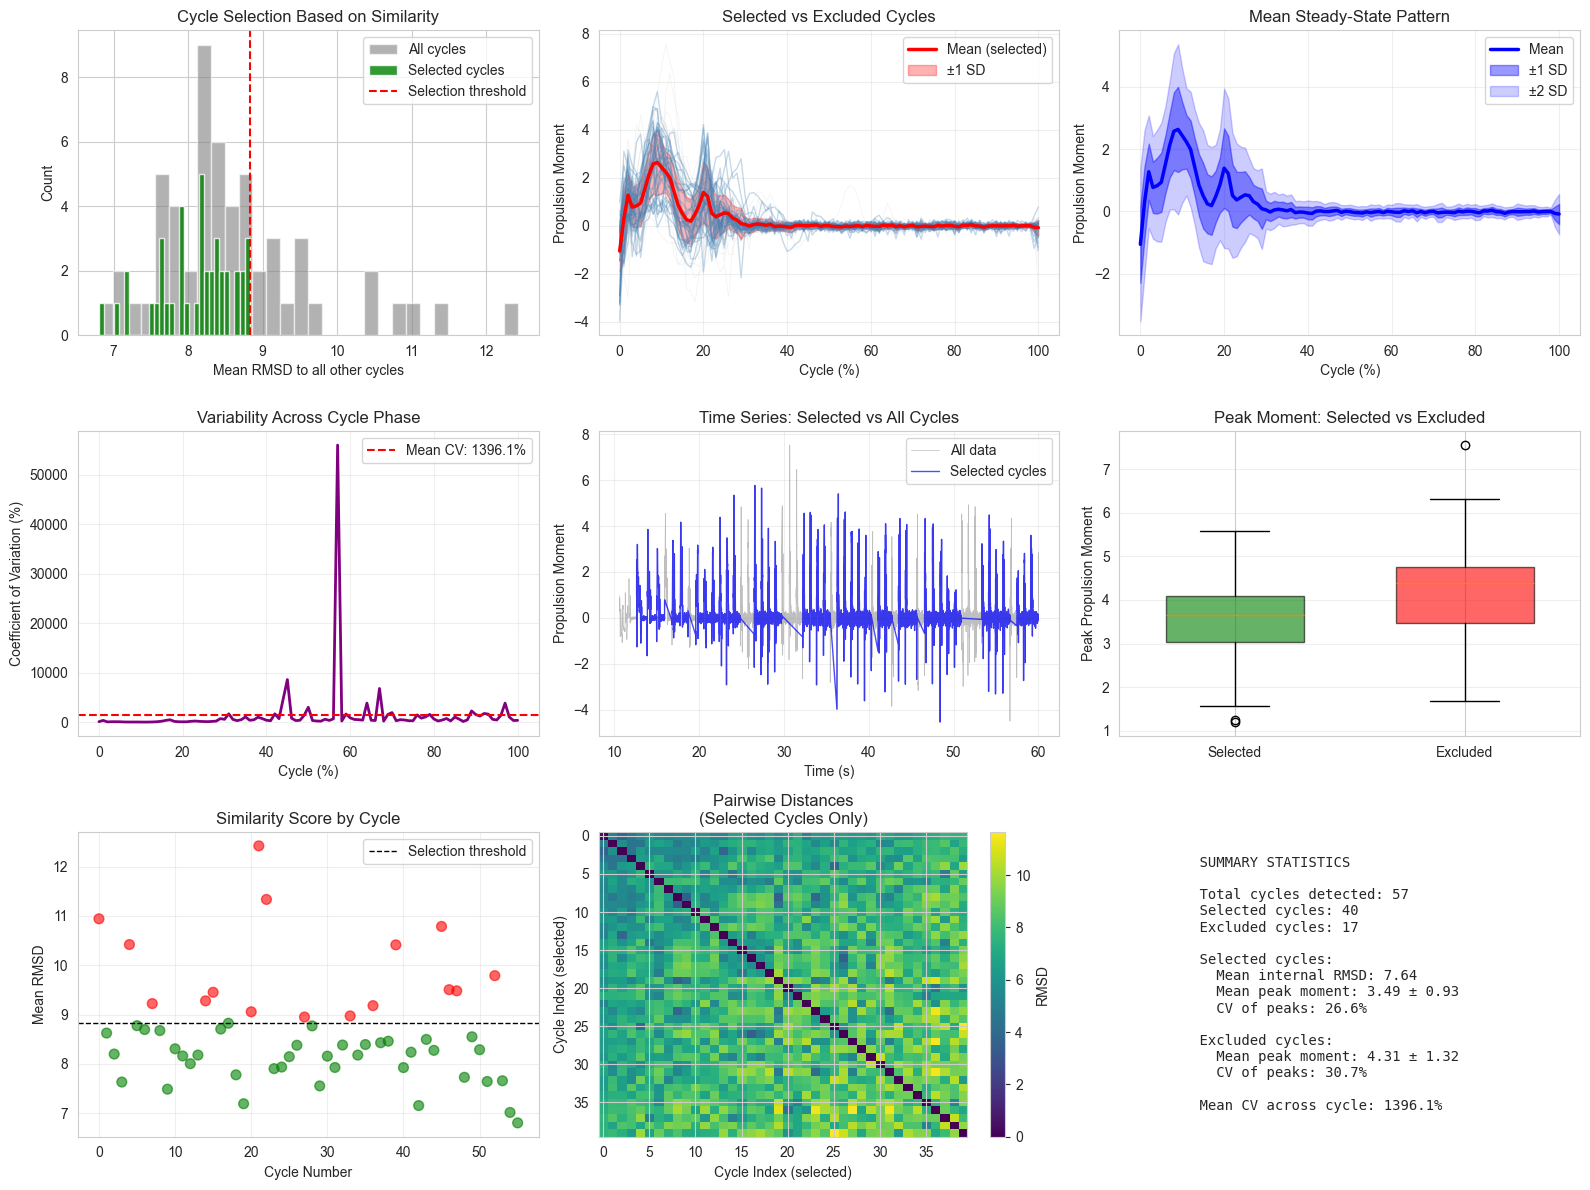

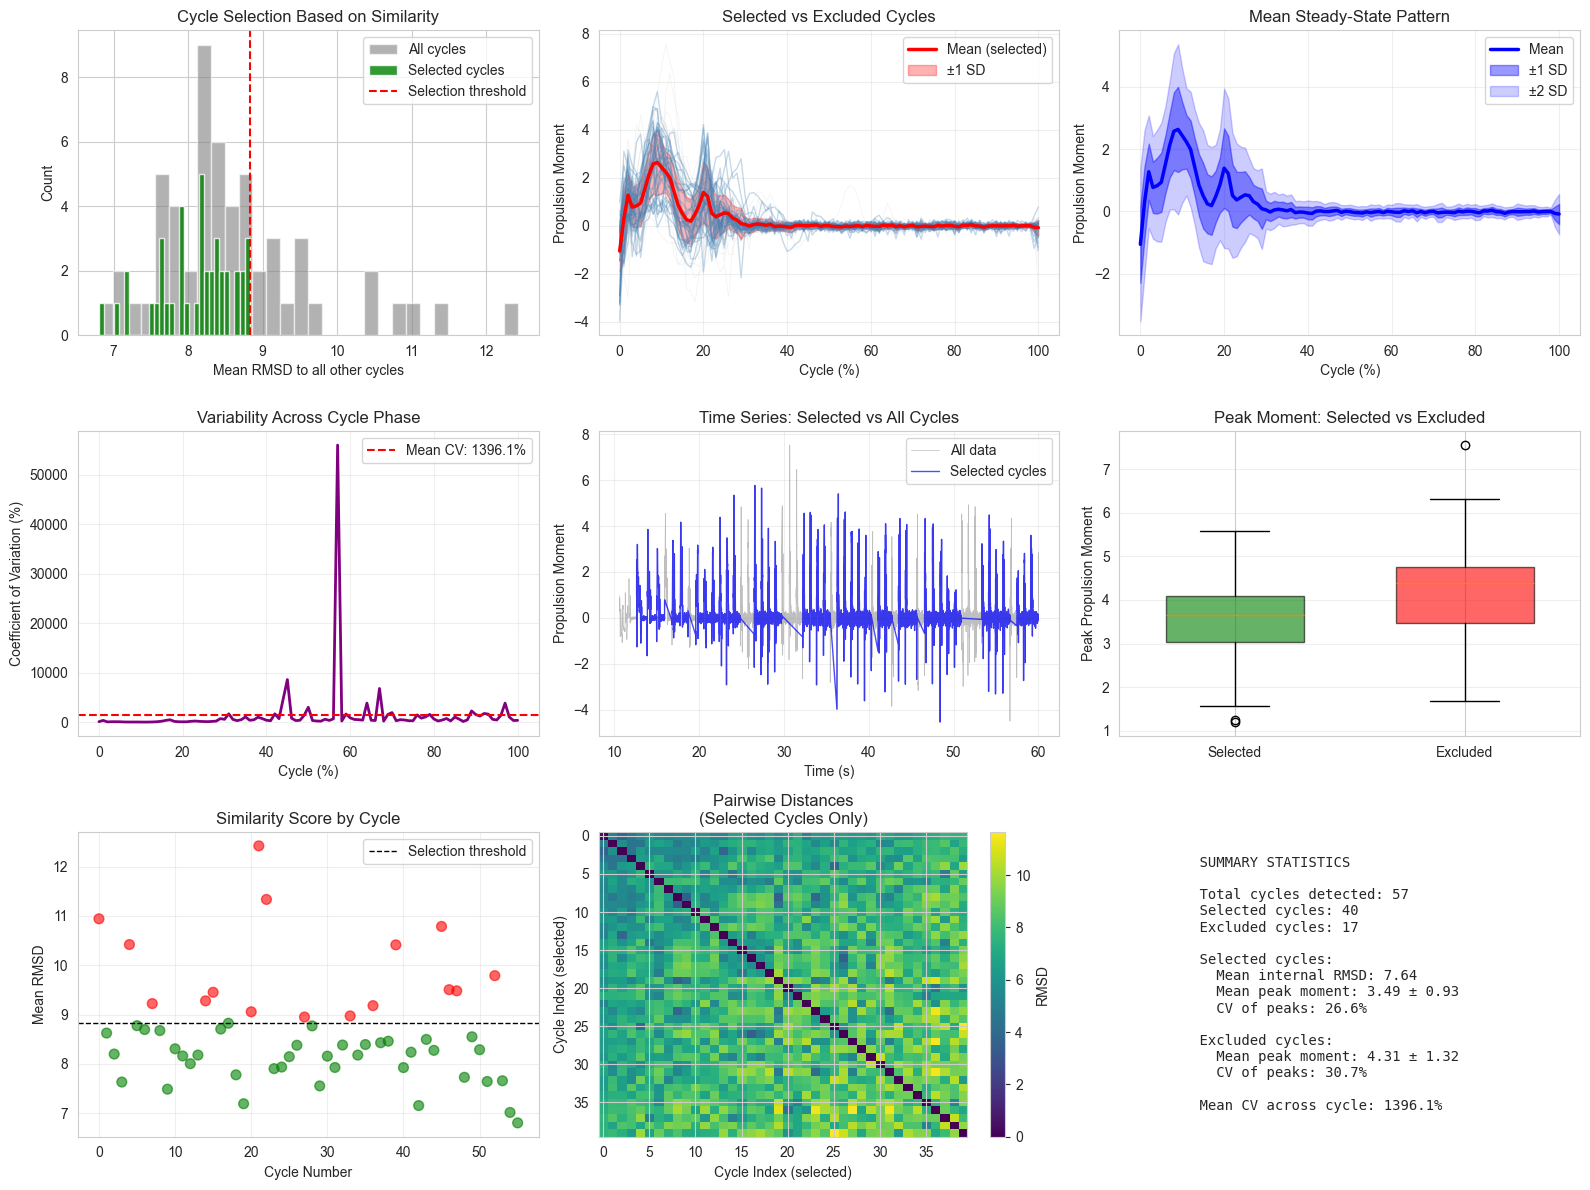

In [9]:
cleaned_df = kinetics_and_results["cleaned_df"]
cycle_calculation_results = kinetics_and_results["cycle_calculations"]

from plots import plot_cycle_selection_analysis

plot_cycle_selection_analysis(cleaned_df, 
                            cycle_calculation_results,
                            time_col='time[sec]', 
                            moment_col='moment_z_total[Nm]',
                            cycle_col='cycle[count]')